In [1]:
# Investment rishk analysis using Monte Carlo

import numpy as np
import matplotlib.pyplot as plt


[98116.03861141097, 133743.71169256748, 115536.25450999333, 110370.72127700027, 89992.44521383877, 108527.58646883693, 95618.16951804576, 107689.269947025, 141163.75686366257, 152380.58467900325, 118333.24364246857, 139354.24176604667, 126219.83249503214, 102512.37259669574, 88290.53341749994, 139363.56062634772, 100881.52335899282, 127641.85420373426, 119394.5040440732, 122794.87913897085, 105202.4100609835, 112197.65481655418, 127212.77223082015, 109660.01691409682, 126139.36477067258, 112330.46949636342, 122241.61634617667, 121216.3859683267, 113100.4197541003, 138700.3725524671, 123907.32407636047, 108104.76660892037, 126549.43516906076, 113333.28529993251, 95987.33173209026, 116179.33228238364, 111947.7707192649, 97367.54285760788, 117334.29340344046, 118713.81715848038, 107527.0993493881, 133058.74206410503, 124887.00348227235, 137009.58816226962, 115920.91731741889, 106665.41612798686, 118610.4313806517, 121719.38112879057, 113510.251930227, 90583.16090941033, 101685.15619497506

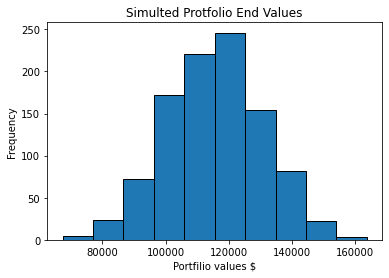

In [4]:
# parameters 
inial_investment = 100000
mean_return=0.15
std_dev = 0.15
num_simulation = 1000

# monte corlos simultion
simulated_end_values=[]
for _ in range(num_simulation):
    # Generate a random annual returns for each simulation
    random_return = np.random.normal(mean_return,std_dev)
    # print(random_return)

    #end value at the end of one year of investment 
    end_value=inial_investment *(1+random_return)

    # store it in the list 
    simulated_end_values.append(end_value)

print(simulated_end_values)

# result 
mean_end_value= np.mean(simulated_end_values) 
# properties of cases where we have a loss (end annual value < initital investment)
risk_of_loss = np.mean(np.array(simulated_end_values)< inial_investment)

print(f"Mean and value $ {mean_end_value:.2f}")
print(f" Probablity of loss: {risk_of_loss * 100:.2f}%")

# ploting the distribution
plt.hist(simulated_end_values,bins=10,edgecolor='k')
plt.title('Simulted Protfolio End Values')
plt.xlabel('Portfilio values $')
plt.ylabel('Frequency')
plt.show()

7
[170. 830.]
[170. 830.]
[159. 841.]
[179. 821.]
[832. 835. 848. 821. 836. 835. 829. 835. 825. 840. 836. 824. 843. 830.
 849. 833. 850. 835. 830. 845. 838. 846. 828. 837. 817. 838. 850. 834.
 837. 809. 826. 824. 818. 828. 845. 837. 842. 847. 826. 850. 812. 819.
 825. 836. 861. 834. 838. 825. 848. 829. 835. 823. 828. 829. 817. 851.
 842. 859. 827. 850. 836. 841. 853. 829. 828. 823. 838. 806. 813. 829.
 823. 823. 831. 834. 833. 831. 847. 842. 829. 803. 823. 827. 853. 844.
 815. 829. 831. 829. 841. 829. 829. 847. 839. 843. 833. 828. 850. 834.
 821. 843. 832. 846. 845. 815. 829. 850. 858. 843. 846. 836. 839. 819.
 806. 828. 833. 813. 838. 831. 838. 842. 839. 831. 839. 845. 830. 832.
 835. 839. 842. 846. 826. 829. 815. 814. 813. 845. 835. 817. 840. 819.
 852. 811. 821. 851. 850. 822. 838. 849. 831. 826. 824. 840. 841. 824.
 822. 828. 822. 823. 839. 826. 824. 847. 842. 822. 857. 843. 837. 832.
 835. 827. 842. 838. 820. 833. 835. 831. 836. 844. 820. 825. 836. 832.
 817. 806. 822. 842. 853. 8

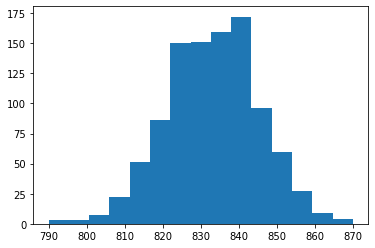

833.068
4165.34
3957.073
166.93200000000002
0.833068


In [21]:
import numpy as np

# part 1 
def roll_dice():
    # simulate of rolling of the dice twice minimun number we get 1 and max is 6
    # add the results of the two simulraiton so possile values will be in between 
    # (1,1) and (6,6) and sum will be between 2 and 12
    # run multiple times to verify 
    return np.sum(np.random.randint(1,7,2))

print(roll_dice())

# Part 2
# some one appooces us saying i will give you 5 dollors if you get 7
# and take 1 dollor if you get a nunber other than 7
# how do we know what will happen?
# out own Monte carlo simulation like function
def monte_carlo_simulations(outcome,runs=1000):
    results=np.zeros(2) # an array results []0 and results[1]  initialized to to two zeroes
    for _ in range(runs):
        if roll_dice() == outcome:
            results[0] += 1
        else:
            results[1] += 1
    return results

# tst 2-3 tiems and calculate how much you will win v lose
print(monte_carlo_simulations(7))
print(monte_carlo_simulations(7))
print(monte_carlo_simulations(7))
print(monte_carlo_simulations(7))

# part 3 
# now do it 1000 times...takes some time

results=np.zeros(1000)

for i in range(1000):
    results[i] = monte_carlo_simulations(7)[1]

print(results)

# lt us plot it 
fig,ax= plt.subplots()
ax.hist(results,bins=15)
plt.show()

# our wins / loss
print(results.mean()) # General win
print(results.mean()*5) # what we will get as win on an average
print(results.mean()*4.75) # just a marginal change in win reward - see the impact
print(1000-results.mean())# what we will pay on an average
print(results.mean()/1000) # provavility of the we wil win results
# the last probabililty should be close to the theoretical probability of getting
# a 7 when we throw two dice 


In [5]:
from pulp import  *

# create the problems variable to contain the problem sata
model= LpProblem("FactoryProductProduction",LpMaximize)

# create variavles for chairs and tables
# parameters name , lower limit , upper minit ,data type
chair=LpVariable("Chair",0,None,LpInteger)
table=LpVariable("Table",0,None,LpInteger)

# create a maximize objective function
model+=300*chair + 1000*table,"Profit"

# create constrainsts
model+= 5 * chair  + 10 * table <= 400,"wood calculation"
model+= 2 * chair  + 6 * table <= 300,"Time calculation"
model += chair >= 2 , "chair constraits"

# problem is solved using pulp choice of solver
model.solve()

# each of the cariavles is printed with its esolved optimum value
for v in model.variables():
    print(v.name,"=", v.varValue)
print("Total profit ",value(model.objective))

Chair = 2.0
Table = 39.0
Total profit  39600.0


In [ ]:
# create 2 variations for car A and B
# parameteres name lower limit upper limit data type
car_A=LpVariable()